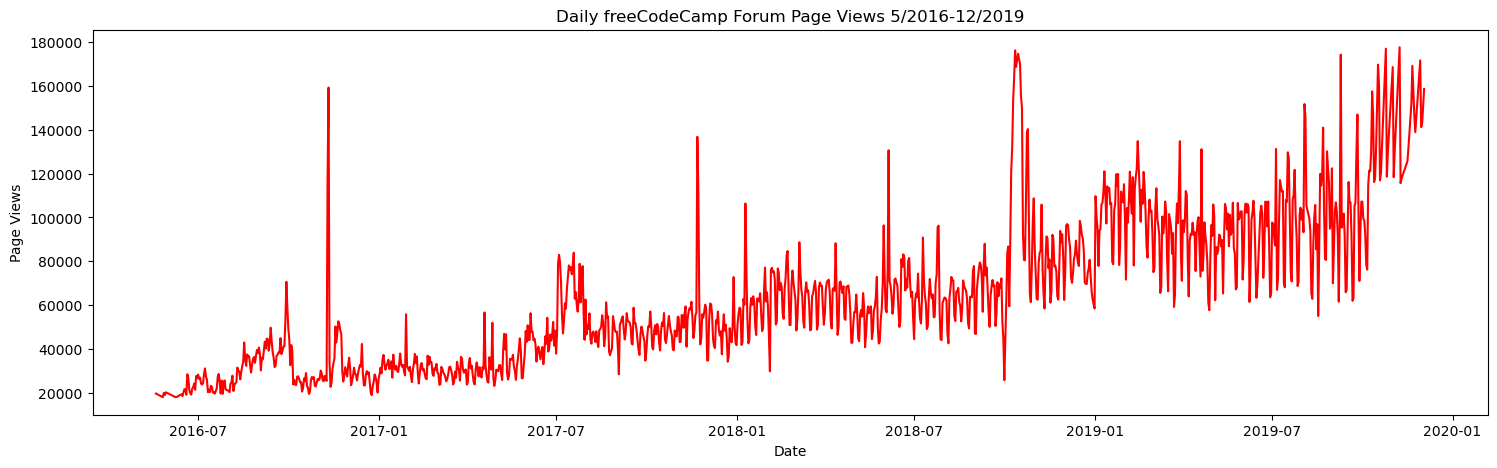

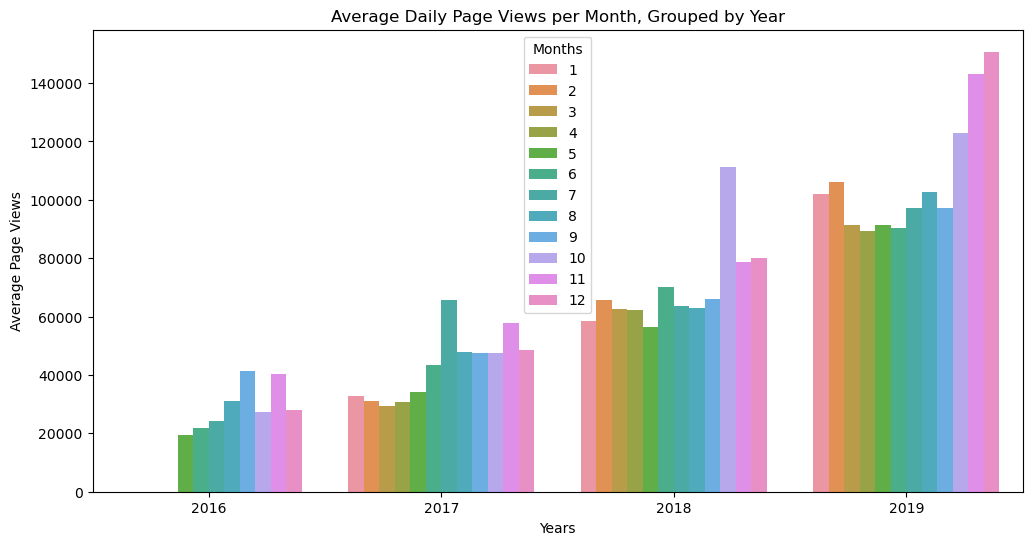

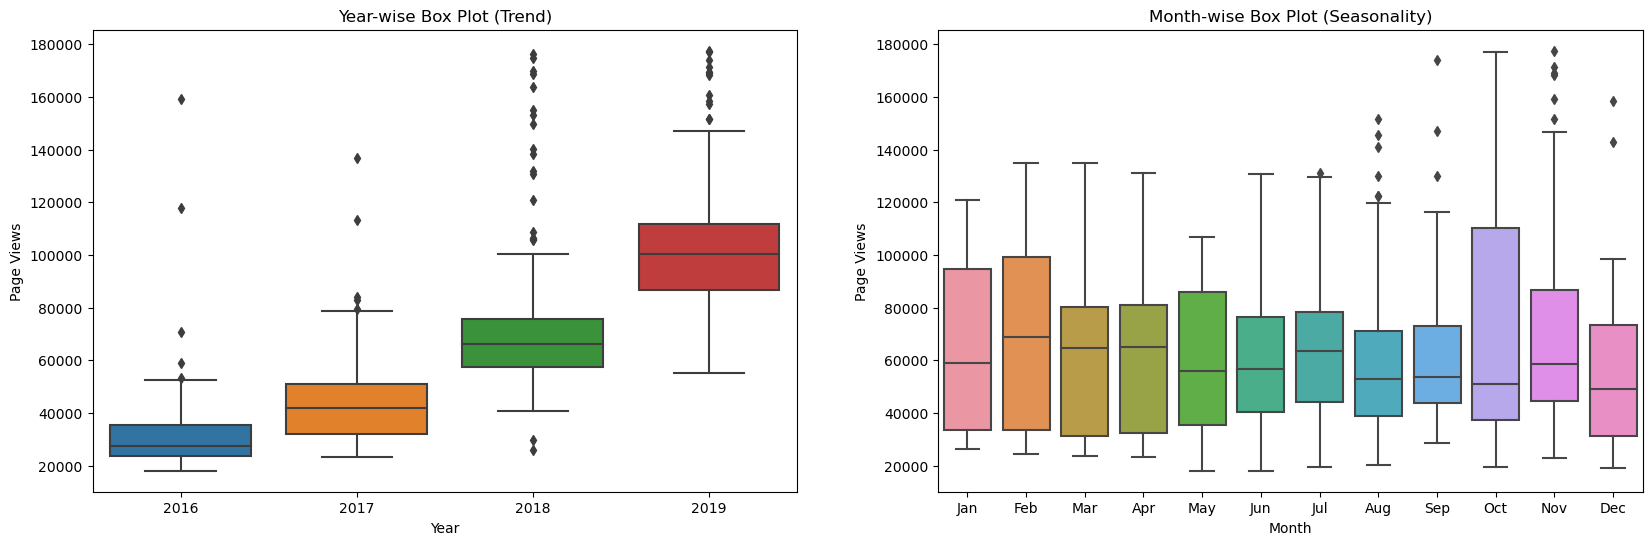

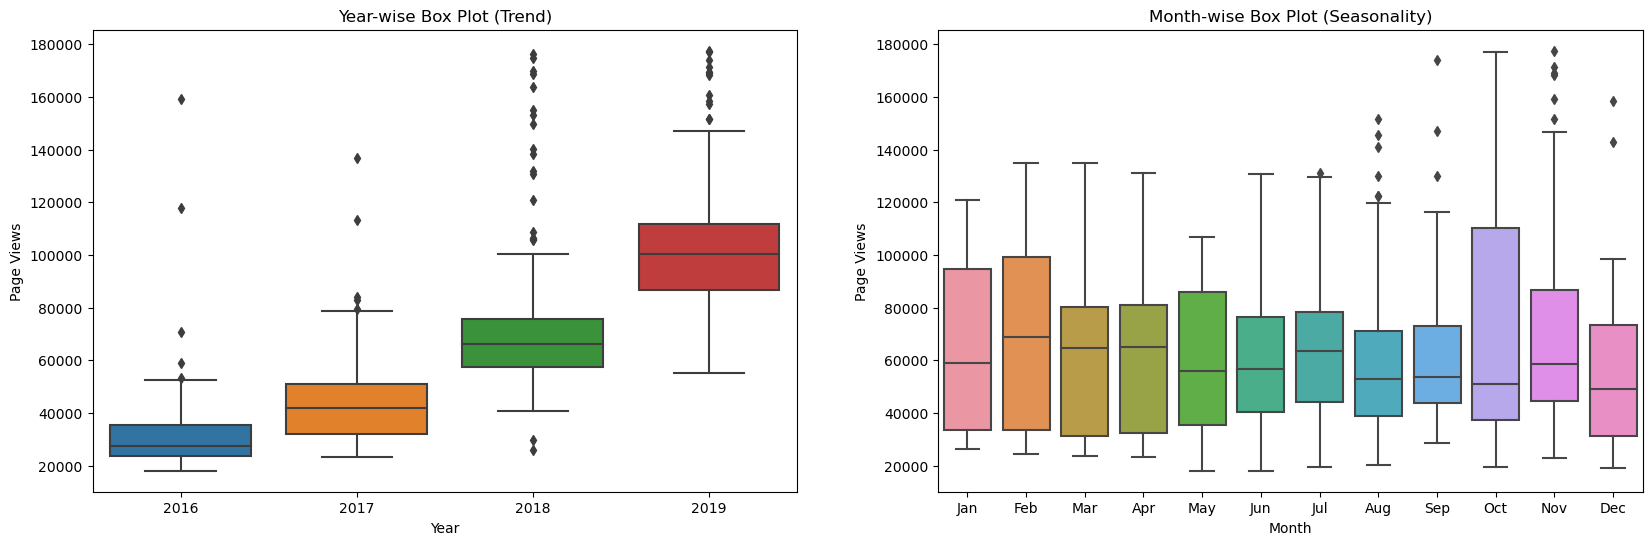

In [16]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')

df['date'] = pd.to_datetime(df['date'])

# Set the index to the date column
df.set_index('date', inplace=True)


df.head()

# Clean data, Clean the data by filtering out days when the page views were in 
# the top 2.5% of the dataset or bottom 2.5% of the dataset.
# Calculate the lower and upper bounds for filtering

# |----|--------------------------------|----|
# 0  2.5%                             97.5%  100

# The leftmost "----" section represents the bottom 2.5% of the data. This is what quantile(0.025) targets.
# The rightmost "----" section represents the top 2.5% of the data. This is what quantile(0.975) targets.
# The middle "--------------------------------" section represents the remaining 95% of the data. This is what we want to keep.

lower_bound = df['value'].quantile(0.025)

upper_bound = df['value'].quantile(0.975)

# Filter the data
df = df[(df['value'] >= lower_bound) & (df['value'] <= upper_bound)]



# Draw line plot
def draw_line_plot(df):

    # Create figure and plot space
    fig = plt.figure(figsize=(18, 5))

    # Plotting data
    plt.plot(df.index, df['value'], color='red')

    # Adding title and labels
    plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
    plt.xlabel('Date')
    plt.ylabel('Page Views')

    # Show plot
    plt.show()

    fig.savefig('line_plot.png')
    return fig


draw_line_plot(df)    

def draw_bar_plot(df):
    # Copy and modify data for monthly bar plot
    df['year'] = df.index.to_series().dt.year 
    df['month'] = df.index.to_series().dt.month
    df_bar = df.groupby(['year', 'month'])['value'].mean().reset_index()
    
    # Draw bar plot
    fig = plt.figure(figsize=(12, 6))
    sns.barplot(x='year', y='value', hue='month', data=df_bar)
    
    plt.xlabel('Years')
    plt.ylabel('Average Page Views')
    plt.legend(title='Months')
    plt.title('Average Daily Page Views per Month, Grouped by Year')
    
    # Save image and return fig 
    fig.savefig('bar_plot.png')
    return fig
draw_bar_plot(df)

def draw_box_plot(df):
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))

    # Create the year-wise box plot
    sns.boxplot(x='year', y='value', data=df, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Create the month-wise box plot
    sns.boxplot(x='month', y='value', data=df, ax=axes[1])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')
    
    # Customize month labels (assuming 'month' is numerical)
    month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    axes[1].set_xticklabels(month_labels)

    # Show the plot
    plt.show()

    return fig

draw_box_plot(df)